In [79]:
pip install pmdarima

     ------------------------------------ 572.0/572.0 kB 781.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [82]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [83]:
milk = pd.read_csv('../Data/monthly-milk-production.csv',index_col='Month')

In [84]:
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [51]:
milk.index = pd.to_datetime(milk.index)
milk.head()

,Monthly milk production (pounds per cow)
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Month'>

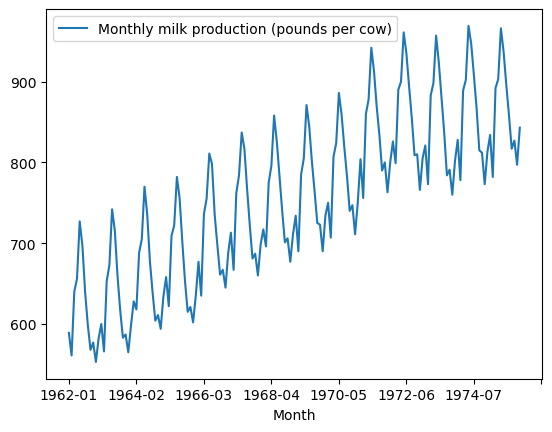

In [85]:
milk.plot()

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total Production')]

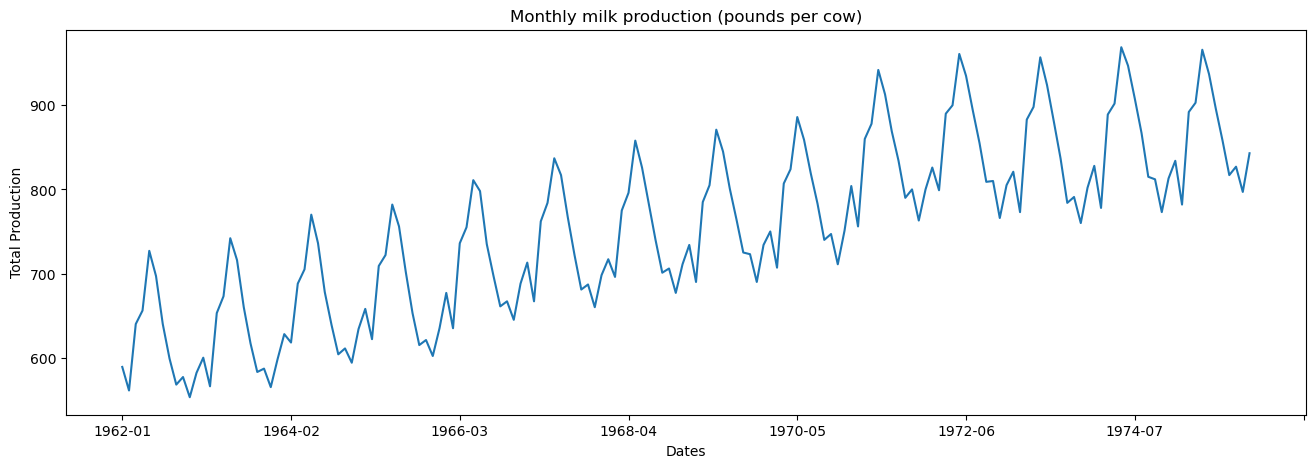

In [90]:
milk.index.freq = 'MS'
ax = milk['Monthly milk production (pounds per cow)'].plot(figsize = (16,5), title = "Monthly milk production (pounds per cow)")
ax.set(xlabel='Dates', ylabel='Total Production')

In [95]:
auto_arima(milk['Monthly milk production (pounds per cow)'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Mon, 13 Feb 2023   AIC                           1072.066
Time:                                      21:10:33   BIC                           1087.315
Sample:                                  01-01-1962   HQIC                          1078.260
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1          0.7310      0.084      8.737      0.000       0.567       0.895
ar.L2          0.1887      0.080      2.355      0.019       0.032       0.346
ma.S.L12      -0.6166      0.073     -8.403      0.000      -0.760      -0.473
sigma2        50.7122      4.915     10.317      0.000      41.078      60.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
train_set = milk.head(156)
train_set

,Monthly milk production (pounds per cow)
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727
...,...
1974-08,867
1974-09,815
1974-10,812


In [97]:
test_set = milk.tail(12)
test_set

,Monthly milk production (pounds per cow)
Month,
1975-01,834
1975-02,782
1975-03,892
1975-04,903
1975-05,966
1975-06,937
1975-07,896
1975-08,858
1975-09,817


In [100]:
arima_model = SARIMAX(train_set['Monthly milk production (pounds per cow)'], order = (2,0,0), seasonal_order = (0,1,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          SARIMAX Results                                           
====================================================================================================
Dep. Variable:     Monthly milk production (pounds per cow)   No. Observations:                  156
Model:                     SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -495.249
Date:                                      Mon, 13 Feb 2023   AIC                            998.499
Time:                                              21:13:54   BIC                           1010.378
Sample:                                          01-01-1962   HQIC                          1003.326
                                               - 12-01-1974                                         
Covariance Type:                                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7425      0.083      8.987      0.000       0.581       0.904
ar.L2          0.2481      0.081      3.078      0.002       0.090       0.406
ma.S.L12      -0.6036      0.079     -7.664      0.000      -0.758      -0.449
sigma2        53.9908      5.477      9.858      0.000      43.257      64.725
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                40.22
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.79
Prob(H) (two-sided):                  0.59   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [102]:
arima_pred = arima_result.predict(start = len(train_set), end = len(milk)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1975-01-01    838.035169
1975-02-01    793.263401
1975-03-01    898.045630
1975-04-01    912.082697
1975-05-01    975.177279
1975-06-01    948.588176
1975-07-01    906.942223
1975-08-01    866.129250
1975-09-01    816.804716
1975-10-01    818.688187
1975-11-01    781.859846
1975-12-01    821.687624
Freq: MS, Name: ARIMA Predictions, dtype: float64

<AxesSubplot:xlabel='Month'>

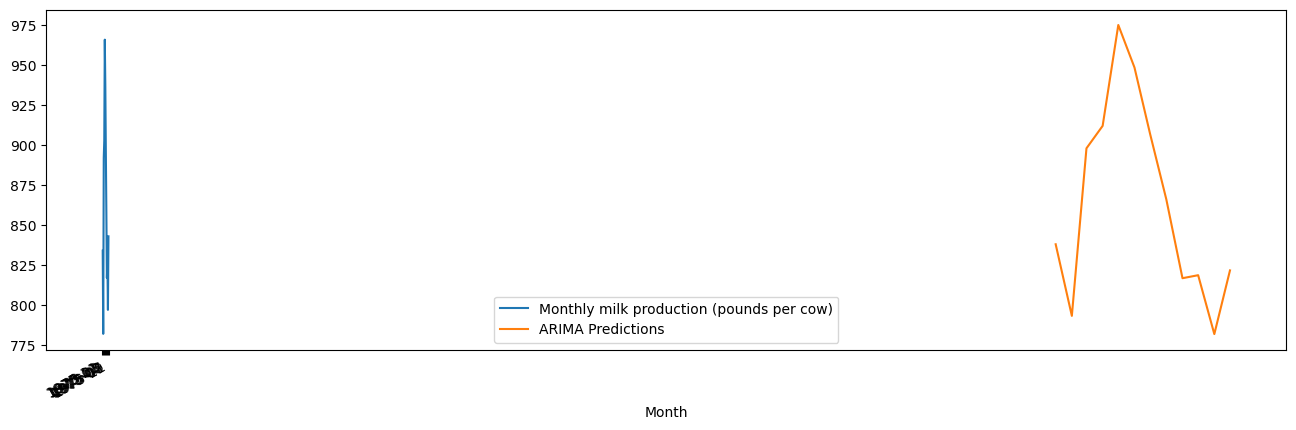

In [103]:
test_set['Monthly milk production (pounds per cow)'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True)

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
array = []
train_data = []
train_labels = []
for i in range(len(milk)):
    array.append(milk.iloc[i]['Monthly milk production (pounds per cow)'])
array = np.array(array).reshape(-1,1)
array = scaler.fit_transform(array)
array

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231],
       [0.        ],
       [0.06971154],
       [0.11298077],
       [0.03125   ],
       [0.24038462],
       [0.28846154],
       [0.45432692],
       [0.39182692],
       [0.25721154],
       [0.15384615],
       [0.07211538],
       [0.08173077],
       [0.02884615],
       [0.10817308],
       [0.18028846],
       [0.15625   ],
       [0.32451923],
       [0.36538462],
       [0.52163462],
       [0.43990385],
       [0.30048077],
       [0.20673077],
       [0.12259615],
       [0.13942308],
       [0.09855769],
       [0.19471154],
       [0.25240385],
       [0.16586538],
       [0.375     ],
       [0.40625   ],
       [0.55048077],
       [0.48798077],
       [0.35817308],
       [0.24038462],
       [0.14903846],
       [0.16346154],
       [0.11778846],
       [0.197

In [57]:
def next_batch(training_data,batch_size,steps):
    """
    INPUT: Data, Batch Size, Time Steps per batch
    OUTPUT: A tuple of y time series results. y[:,:-1] and y[:,1:]
    """
    
    # STEP 1: Use np.random.randint to set a random starting point index for the batch.
    # Remember that each batch needs have the same number of steps in it.
    # This means you should limit the starting point to len(data)-steps
    rand_start = np.random.randint(0,len(training_data)-steps) 
    # STEP 2: Now that you have a starting index you'll need to index the data from
    # the random start to random start + steps + 1. Then reshape this data to be (1,steps+1)
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)
    # STEP 3: Return the batches. You'll have two batches to return y[:,:-1] and y[:,1:]
    # You'll need to reshape these into tensors for the RNN to .reshape(-1,steps,1
    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1)

In [58]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [59]:
num_inputs = 1
num_time_steps = 12
num_neurons = 100
num_outputs = 1
learning_rate = 0.03
num_train_iterations = 20
batch_size = 1

In [60]:

train_set.shape[0]

156

In [75]:
X = []
y = []
for i in range(0,train_set.shape[0]):
    X.append(train_set[i])
    y.append(train_set[i,0])
    
X,y = np.array(X), np.array(y)
X.shape, y.shape

((156, 1), (156,))

In [76]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import keras
reg = Sequential()

reg.add(LSTM(units=num_neurons, activation ='relu', return_sequences = True, input_shape= (X.shape[1],1)))
optimizer = keras.optimizers.Adam(lr=learning_rate)
reg.compile(optimizer=optimizer, loss ='mean_squared_error')

reg.fit(X, y,epochs=num_train_iterations,batch_size=batch_size)


Epoch 1/20


c:\Users\Mamoon\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


156/156 [==============================] - 0s 802us/step - loss: 0.1546
Epoch 2/20
156/156 [==============================] - 0s 765us/step - loss: 0.1402
Epoch 3/20
156/156 [==============================] - 0s 802us/step - loss: 0.1401
Epoch 4/20
156/156 [==============================] - 0s 781us/step - loss: 0.1400
Epoch 5/20
156/156 [==============================] - 0s 769us/step - loss: 0.1400
Epoch 6/20
156/156 [==============================] - 0s 763us/step - loss: 0.1400
Epoch 7/20
156/156 [==============================] - 0s 774us/step - loss: 0.1400
Epoch 8/20
156/156 [==============================] - 0s 768us/step - loss: 0.1399
Epoch 9/20
156/156 [==============================] - 0s 756us/step - loss: 0.1399
Epoch 10/20
156/156 [==============================] - 0s 827us/step - loss: 0.1399
Epoch 11/20
156/156 [==============================] - 0s 769us/step - loss: 0.1399
Epoch 12/20
156/156 [==============================] - 0s 781us/step - loss: 0.1398
Epoch 13/20


In [77]:
test_set['Month']

KeyError: 'Month'

In [68]:
testX = test_set.index['Month'].to_numpy()
y_predict = reg.predict(testX)
y_predict

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
init = tf.global_variables_initializer()

AttributeError: module 'tensorflow' has no attribute 'global_variables_initializer'

In [ ]:
saver = tf.train.Saver()

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'Saver'

In [ ]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

AttributeError: module 'tensorflow' has no attribute 'GPUOptions'

In [ ]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(init)
    
    for iteration in range(num_train_iterations):
        
        X_batch, y_batch = next_batch(train_scaled,batch_size,num_time_steps)
        sess.run(train, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    # Save Model for Later
    saver.save(sess, "./ex_time_series_model")

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
with tf.Session() as sess:
    
    # Use your Saver instance to restore your saved rnn time series model
    saver.restore(sess, "./ex_time_series_model")

    # Create a numpy array for your genreative seed from the last 12 months of the 
    # training set data. Hint: Just use tail(12) and then pass it to an np.array
    train_seed = list(train_scaled[-12:])
    
    ## Now create a for loop that 
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

AttributeError: module 'tensorflow' has no attribute 'Session'

In [ ]:
reg.fit()

NameError: name 'train_seed' is not defined

In [ ]:
test_set['Generated'] = results

NameError: name 'results' is not defined

In [22]:
test_set.columns

Index(['Monthly milk production (pounds per cow)'], dtype='object')

<AxesSubplot:xlabel='Month'>

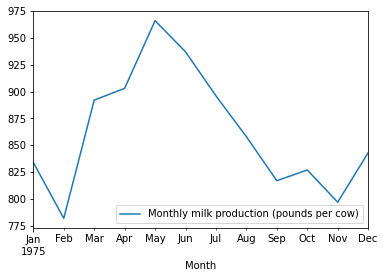

In [ ]:
test_set.plot()

In [ ]:
nd arraytest_set(0)

TypeError: 'DataFrame' object is not callable

In [20]:
test_set

,Monthly milk production (pounds per cow)
Month,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817
